### Figure 6: Correlation Spatial Mean

In [1]:
import numpy as np
from esda.moran import Moran,Moran_Local
from libpysal.weights import lat2W
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import properscoring as ps
import warnings
from scipy import stats
# from utils.evaluation import plot_histogram,calc_peak,calc_mean
from sklearn.metrics import mean_squared_error
from math import sqrt
import xesmf as xe
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))
# https://seaborn.pydata.org/examples/layered_bivariate_plot.html

/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
model = ''
# set mode
mode = 'validation'

# load datasets
real = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_real-opt.npy' % (model,mode))[0][:,:,:,0]
pred = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0][:,:,:,0]

pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/dsrnngan_predictions/validation_pred-opt.npy')[0][:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0][:,:,:,0]

pred_ensemble_vaegan = np.load('/user/home/al18709/work/vaegan/predictions/validation_pred.npy')[0]
pred_ensemble_gan = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_pred-opt.npy' % (model,mode))[0]
inputs = np.load('/user/home/al18709/work/dsrnngan_predictions%s/%s_input-opt.npy' % (model,mode))[0][:,:,:,0]

# regrid inputs
grid_in = {"lon": np.linspace(0, 100, 10), "lat": np.linspace(0, 100, 10)}
grid_out = {"lon": np.linspace(0, 100, 100), "lat": np.linspace(0, 100, 100)}
regridder = xe.Regridder(grid_in, grid_out, "bilinear")
inputs_hr = regridder(inputs)

print(inputs_hr.shape)

(16253, 100, 100)


In [6]:
# Plot Scatter
def scatter_data(pred,real):
	pred_max = np.max(np.max(pred,axis=2),axis=1)
	real_max = np.max(np.max(real,axis=2),axis=1)

	pred_vector = pred_max.ravel()
	real_vector = real_max.ravel()

	return pred_vector,real_vector



(16252,)
(16253,)


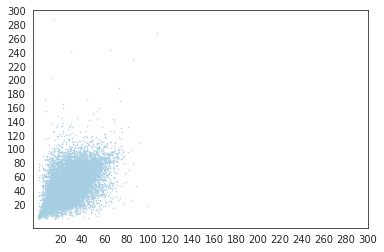

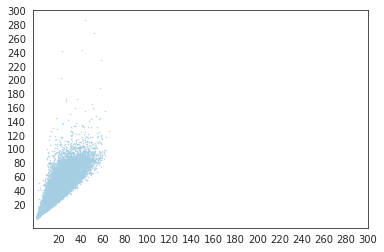

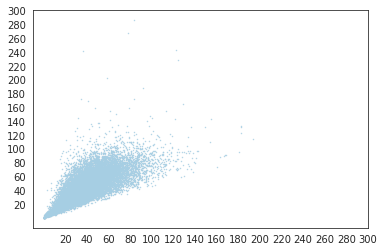

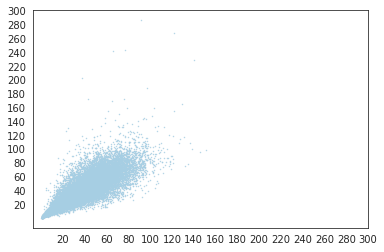

In [11]:
x_unet,y_unet = scatter_data(pred_cnn,real)
x_inputs,y_inputs = scatter_data(inputs_hr,real)
x_vaegan,y_vaegan = scatter_data(pred_vaegan,real)
x_dsrnngan,y_dsrnngan = scatter_data(pred_dsrnngan,real)

print(x_unet.shape)
print(y_unet.shape)

plt.scatter(x_unet,y_unet[:-1],s=0.2)
plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.yticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.show()

plt.scatter(x_inputs,y_inputs,s=0.2)
plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.yticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.show()

plt.scatter(x_vaegan,y_vaegan,s=0.2)
plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.yticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.show()

plt.scatter(x_dsrnngan,y_dsrnngan,s=0.2)
plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.yticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300])
plt.show()

